In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from itertools import repeat
import pprint

In [8]:
all_data = {}
for checkpoint in range(0,91,10):
    avg_rew = []
    counted_food = Counter()
    for run in range(10):
        action = np.loadtxt(f"logs/task2/validation_runs/Training/Train_{checkpoint}/run_{run+1}_val_act.txt").astype(int)
        food = np.loadtxt(f"logs/task2/validation_runs/Training/Train_{checkpoint}/run_{run+1}_val_food.txt").astype(int)
        reward = np.loadtxt(f"logs/task2/validation_runs/Training/Train_{checkpoint}/run_{run+1}_val_rew.txt").astype(int)
        avg_rew.extend(reward)
        counted_food.update(food)
    for food in counted_food:
        counted_food[food] /= 10

    all_data[checkpoint] = (np.average(avg_rew),counted_food)

C:\Users\pgeri\AppData\Local\Temp\ipykernel_20276\1906193160.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(range(-20,91,20)))


<function matplotlib.pyplot.show(close=None, block=None)>

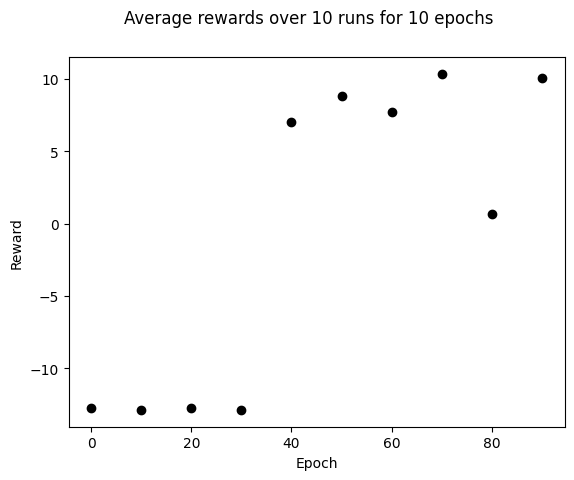

In [56]:
fig , ax = plt.subplots()
for idx, checkpoint in enumerate(all_data):
    ax.scatter(idx,all_data[checkpoint][0], c="black")
ax.set_ylabel('Reward')
ax.set_xlabel('Epoch')
ax.set_xticklabels(list(range(-20,91,20)))
fig.suptitle("Average rewards over 10 runs for 10 epochs")
plt.show

In [11]:
all_data[90][1]

Counter({1: 7.7, 2: 2.2, 3: 16.7, 4: 6.2, 5: 8.0, 6: 9.6, 7: 1.4})

In [10]:
for keys in all_data[90][1]:
    print(keys)
    

1
2
3
4
5
6
7


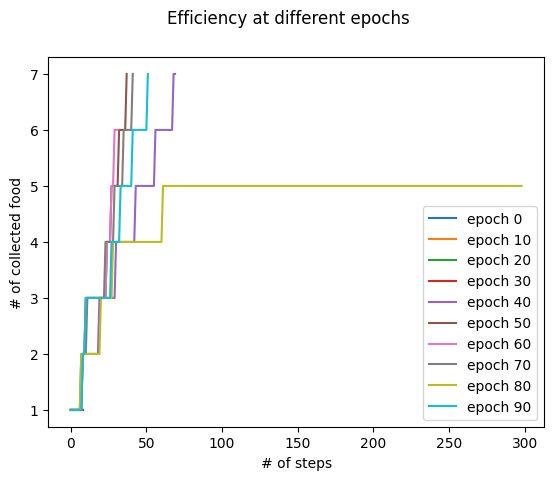

In [22]:
for checkpoint in all_data:
    avg_food = []
    for food in all_data[checkpoint][1]:
        food_list = list(repeat(food,round(all_data[checkpoint][1][food])))
        avg_food.extend(food_list)
    plt.plot(avg_food, label = f"epoch {checkpoint}")
plt.legend()
plt.ylabel("# of collected food")
plt.xlabel("# of steps")
plt.suptitle("Efficiency at different epochs")
plt.show()

In [2]:
val_data = {}
for run in ["Train","Val1","Val2","Val3","Val4"]:
    all_food = []
    counted_food = Counter()
    for name in ["Gary","Josip"]:
        if name == "Josip":
            all_run = 20
        else : all_run = 10
        for checkpoint in range(1,all_run+1):
            action = np.loadtxt(f"logs/task2/validation_runs/{name}/{run}/run_{checkpoint}_val_act.txt").astype(int)
            food = np.loadtxt(f"logs/task2/validation_runs/{name}/{run}/run_{checkpoint}_val_food.txt").astype(int)
            all_food.append(max(food))
    val_data[run] = all_food
#             counted_food.update(food)
#     for food in counted_food:
#         counted_food[food] /= 30
#     val_data[run] = np.average(list(counted_food.values()))
pprint.pprint(val_data)

{'Train': [3,
           7,
           7,
           7,
           7,
           4,
           3,
           3,
           7,
           4,
           7,
           4,
           7,
           5,
           3,
           3,
           3,
           3,
           7,
           7,
           7,
           7,
           3,
           7,
           7,
           7,
           7,
           7,
           7,
           7],
 'Val1': [7,
          7,
          7,
          3,
          7,
          7,
          7,
          7,
          3,
          7,
          3,
          3,
          7,
          7,
          7,
          7,
          7,
          3,
          7,
          7,
          7,
          3,
          7,
          7,
          7,
          7,
          7,
          7,
          7,
          3],
 'Val2': [7,
          4,
          7,
          7,
          7,
          7,
          5,
          5,
          7,
          4,
          5,
          5,
          5,
          5,
      

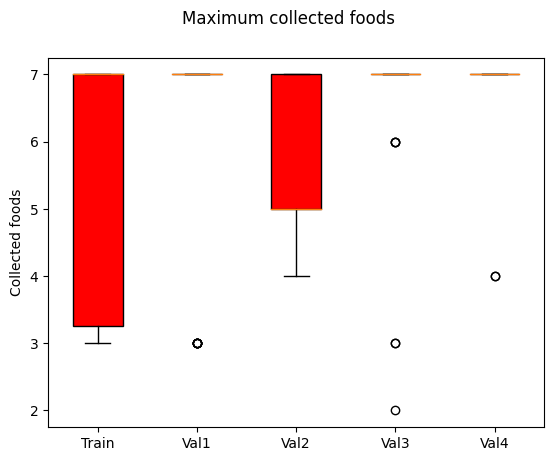

In [4]:
fig , ax = plt.subplots()
ax.boxplot([val_data[key] for key in val_data],positions=[1,2,3,4,5] , patch_artist=True,
            boxprops=dict(facecolor="red"))
ax.set_ylabel('Collected foods')
ax.set_xticklabels([key for key in val_data])
fig.suptitle("Maximum collected foods")
plt.show()


In [69]:
for key in val_data:
    np.savetxt(f"max_food_{key}",np.array(val_data[key]))